# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Desiree Blake https://github.com/dblake26/web-scraping 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                  Version
------------------------ -----------
annotated-types          0.6.0
anyio                    3.6.2
appdirs                  1.4.4
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asgiref                  3.8.1
asttokens                2.2.1
async-lru                2.0.2
attrs                    23.1.0
Babel                    2.12.1
backcall                 0.2.0
beautifulsoup4           4.12.2
black                    23.3.0
bleach                   6.0.0
blis                     0.7.11
build                    0.10.0
catalogue                2.0.10
certifi                  2024.2.2
cffi                     1.15.1
charset-normalizer       3.3.2
click                    8.1.7
cloudpathlib             0.16.0
colorama                 0.4.6
comm                     0.1.3
confection               0.1.4
contourpy                1.2.0
cycler                   0.12.1
cymem                    2.0.8
debugpy         

Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)
html_content = response.text

# Parse the HTML
soup = BeautifulSoup(html_content, "html.parser")

# Find the article content
article_content = soup.find("div", class_="entry-content")

# Save the article content to a pickle file
with open("article_content.pkl", "wb") as file:
    pickle.dump(str(article_content), file)


Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
import pickle
from bs4 import BeautifulSoup

# Read the article HTML from the pickle file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML
soup = BeautifulSoup(article_html, "html.parser")

# Extract and print the text
article_text = soup.get_text()
print(article_text)



When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this w

Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from collections import Counter
import string

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define a function to filter out unwanted tokens
def is_valid_token(token):
    return not (token.is_punct or token.is_stop or token.is_space)

# Filter out unwanted tokens and convert to lowercase
tokens = [token.text.lower() for token in doc if is_valid_token(token)]

# Count the frequencies of each token
token_counter = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_counter.most_common(5)

# Print the most common tokens
print("Top 5 Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies
print("\nAll Tokens and Their Frequencies:")
for token, frequency in token_counter.items():
    print(f"{token}: {frequency}")


Top 5 Most Common Tokens:
laser: 30
headlights: 17
technology: 10
headlight: 10
led: 10

All Tokens and Their Frequencies:
think: 1
onward: 1
march: 1
automotive: 6
technology: 10
headlights: 17
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
day: 2
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
laser: 30
bwm: 2
prototype: 1
headlight: 10
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 8
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
work: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow: 1
phosphor: 3
similar: 1
white: 

Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define a function to filter out unwanted tokens
def is_valid_token(token):
    return not (token.is_punct or token.is_stop or token.is_space)

# Filter out unwanted tokens, convert them to lowercase, and extract lemmas
lemmas = [token.lemma_.lower() for token in doc if is_valid_token(token)]

# Count the frequencies of each lemma
lemma_counter = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the most common lemmas
print("Top 5 Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies
print("\nAll Lemmas and Their Frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")


Top 5 Most Common Lemmas:
laser: 35
headlight: 26
beam: 12
technology: 10
light: 9

All Lemmas and Their Frequencies:
think: 1
onward: 1
march: 1
automotive: 6
technology: 10
headlight: 26
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
work: 2
improve: 1
state: 2
art: 1
lighting: 4
day: 3
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
laser: 35
headlights: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vibrant: 1
bounce: 1
reflector: 1
road: 2
bui

Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    doc = nlp(sentence)
    
    # Count the number of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in doc if token.lower_ in interesting_tokens)
    
    # Return the score
    return interesting_token_count / len(doc)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence
    doc = nlp(sentence)
    
    # Count the number of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    # Return the score
    return interesting_lemma_count / len(doc)

# Example usage:
sentence = "Laser headlights are a new advancement in automotive lighting technology."
interesting_tokens = ["laser", "headlights", "automotive"]
interesting_lemmas = ["laser", "headlight", "automotive"]

print("Score by Token:", score_sentence_by_token(sentence, interesting_tokens))
print("Score by Lemma:", score_sentence_by_lemma(sentence, interesting_lemmas))


Score by Token: 0.2727272727272727
Score by Lemma: 0.2727272727272727


Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

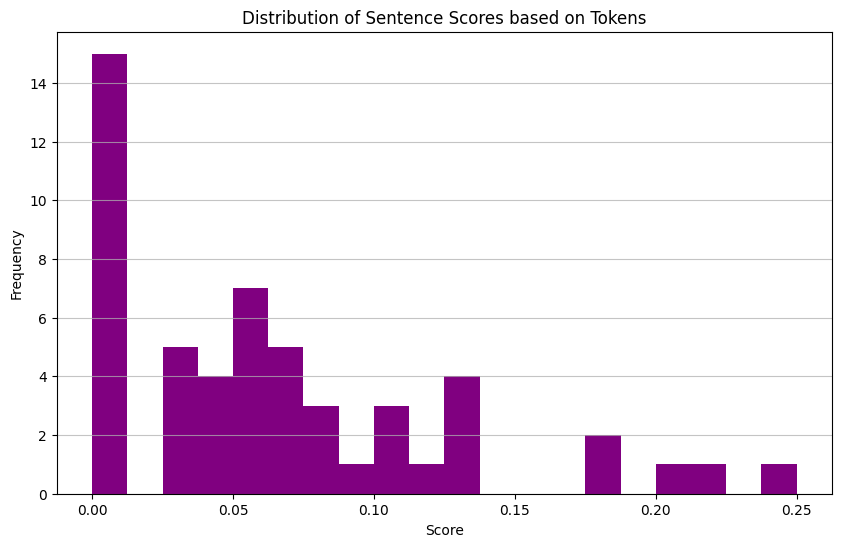

In [9]:
import spacy
import matplotlib.pyplot as plt

# Retrieves text from HTML and split text into sentences
sentences = soup.get_text().split('.')

# Calculate score for each sentence 
token_scores = [score_sentence_by_token(sentence, [token.lower() for token, _ in most_common_tokens]) for sentence in sentences if sentence.strip()]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color='purple')
plt.title('Distribution of Sentence Scores based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

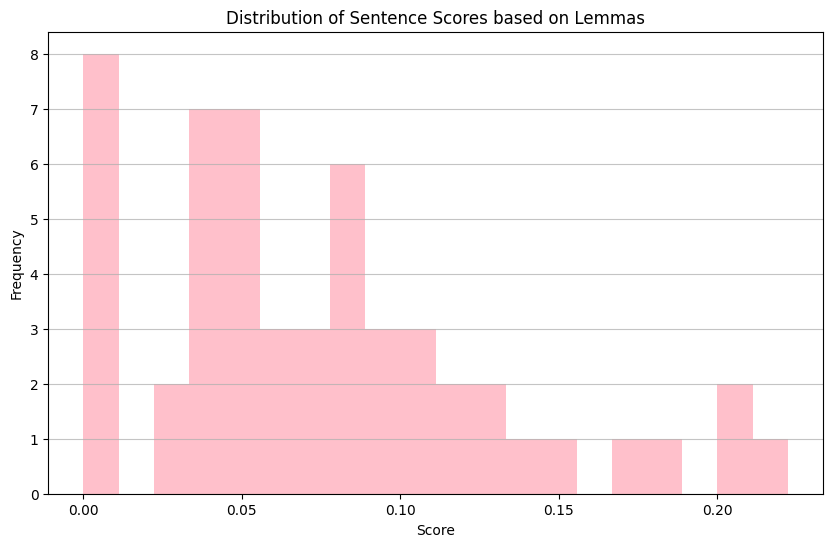

In [11]:
# Make a list containing the scores (using lemmas) of every sentence in the article
lemma_scores = [score_sentence_by_lemma(sentence, [lemma.lower() for lemma, _ in most_common_lemmas]) for sentence in sentences if sentence.strip()]

# Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='pink')
plt.title('Distribution of Sentence Scores based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only want to consider nouns as interesting words, we would omit all tokens and lemmas that are not nouns. In spaCy, nouns are labeled with the POS (Part of Speech) tag 'NOUN'. Therefore, we would remove all tokens and lemmas that do not have this POS tag.

To change the code to only consider nouns, we can modify the functions used to extract the most frequent tokens and lemmas to filter out only nouns. Specifically, when calculating the most common tokens and lemmas, we would filter out all tokens and lemmas that are not labeled as nouns.